In [25]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [17]:
niagra_historical_df = pd.read_csv('../Data/niagra-flow-historical-feet.tsv', sep='\s+', skiprows=[1])

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_40435/2735171953.py:1: SyntaxWarning: invalid escape sequence '\s'
  niagra_historical_df = pd.read_csv('../Data/niagra-flow-historical-feet.tsv', sep='\s+', skiprows=[1])


In [3]:
niagra_historical_df.head()

,agency_cd,site_no,parameter_cd,ts_id,year_nu,month_nu,mean_va
0,USGS,4216000,60,217733,1980,1,229600
1,USGS,4216000,60,217733,1980,2,217200
2,USGS,4216000,60,217733,1980,3,223400
3,USGS,4216000,60,217733,1980,4,239600
4,USGS,4216000,60,217733,1980,5,242700


In [16]:
def get_time(month_nu: int) -> float:
    '''
    Conversion flow in m^3/s to m^3/month
    '''
    if month_nu in [4, 6, 9, 11]:
        return 2.592 * 1e6
    elif month_nu == 2:
        return 2.4192*1e6
    else:
        return 2.6784*1e6

In [18]:
niagra_historical_df['mean_va'] = niagra_historical_df['mean_va'] * 0.0283168

In [19]:
niagra_historical_df['mean_va'] *= niagra_historical_df['month_nu'].apply(get_time)

In [20]:
all_flows = np.load('../Data/flow-vectors.npy')

In [21]:
len(all_flows)

108

In [57]:
lawrence_historical_df = pd.read_csv('../Data/lawrence-river-historical.tsv', sep='\s+', skiprows=[1])

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/qq/btlj3sps3xsc18h_1y2zsc5r0000gn/T/ipykernel_40435/223252571.py:1: SyntaxWarning: invalid escape sequence '\s'
  lawrence_historical_df = pd.read_csv('../Data/lawrence-river-historical.tsv', sep='\s+', skiprows=[1])


In [58]:
lawrence_historical_df.head()

,agency_cd,site_no,parameter_cd,ts_id,year_nu,month_nu,mean_va
0,USGS,4264331,60,105820,2000,1,209800
1,USGS,4264331,60,105820,2000,2,208400
2,USGS,4264331,60,105820,2000,3,205600
3,USGS,4264331,60,105820,2000,4,209800
4,USGS,4264331,60,105820,2000,5,239000


In [59]:
lawrence_historical_df['mean_va'] = lawrence_historical_df['mean_va'] * 0.0283168
lawrence_historical_df['mean_va'] *= lawrence_historical_df['month_nu'].apply(get_time)

In [31]:
start_date = datetime(1980, 1, 1)
end_date = datetime(2011, 12, 31)
date_range = [start_date + timedelta(days=i * 30) for i in range(len(niagra_historical_df['mean_va']))]

start_date2 = datetime(2012, 1, 1)
end_date2 = datetime(2020, 12, 31)
date_range2 = [start_date2 + timedelta(days=i * 30) for i in range(len(all_flows))]

In [60]:
start_date3 = datetime(2000, 1, 1)
end_date3 = datetime(2020, 12, 31)
date_range3 = [start_date3 + timedelta(days=i * 30) for i in range(len(lawrence_historical_df['mean_va']))]

In [65]:
len(date_range2)

108

In [63]:
len(all_flows[:, 4])

108

In [64]:
len(all_flows[:, 3])

108

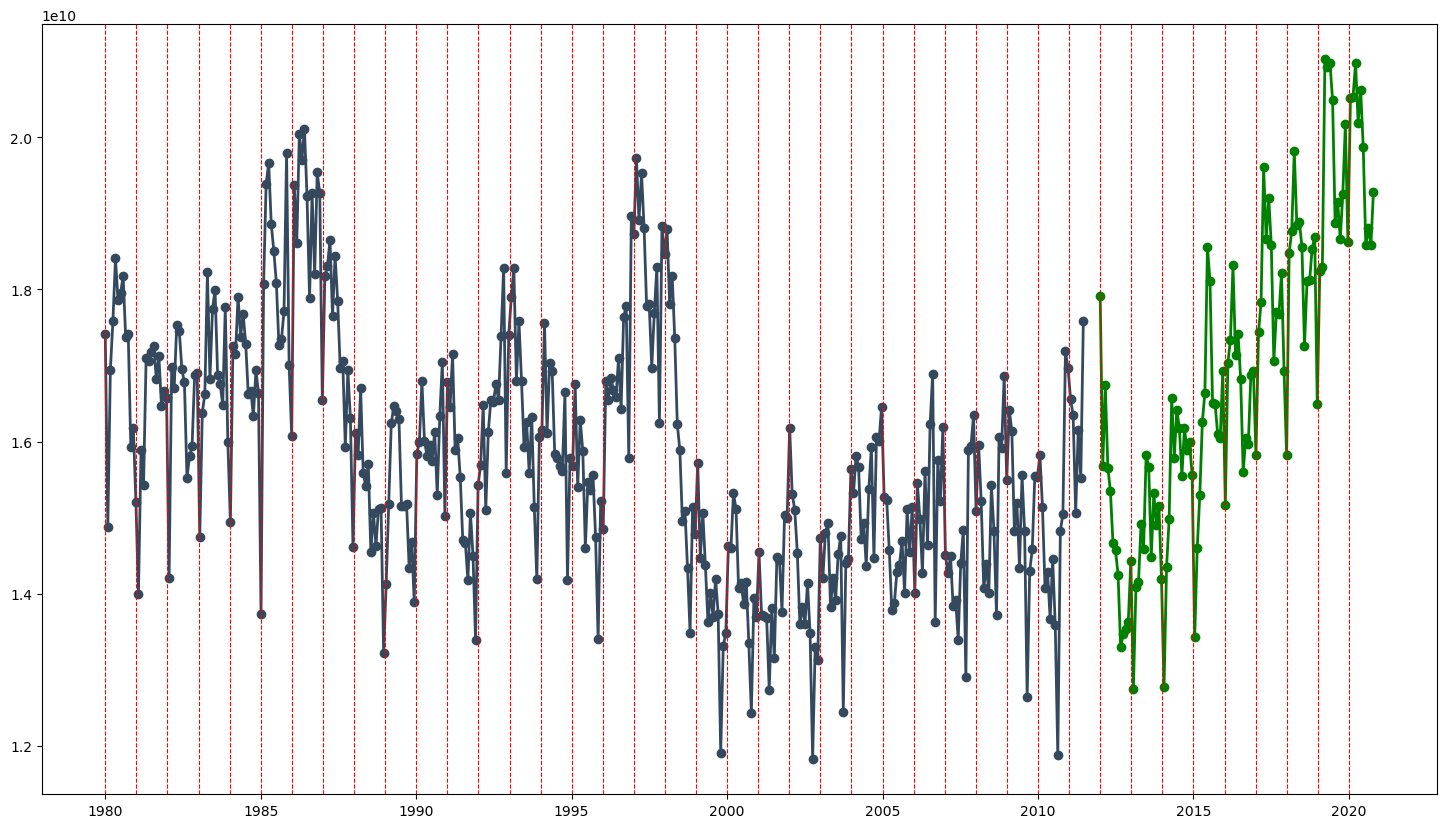

In [39]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(date_range, niagra_historical_df['mean_va'], linewidth=2, marker='o', linestyle='-', color='#34495E', label='Niagra River Dataset1')
ax.plot(date_range2, all_flows[:, 3], linewidth=2, marker='o', linestyle='-', color='green', label='Niagra River Dataset1')


for year in range(start_date.year, end_date.year + 1):
    ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

for year in range(start_date2.year, end_date2.year + 1):
    ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

plt.show()

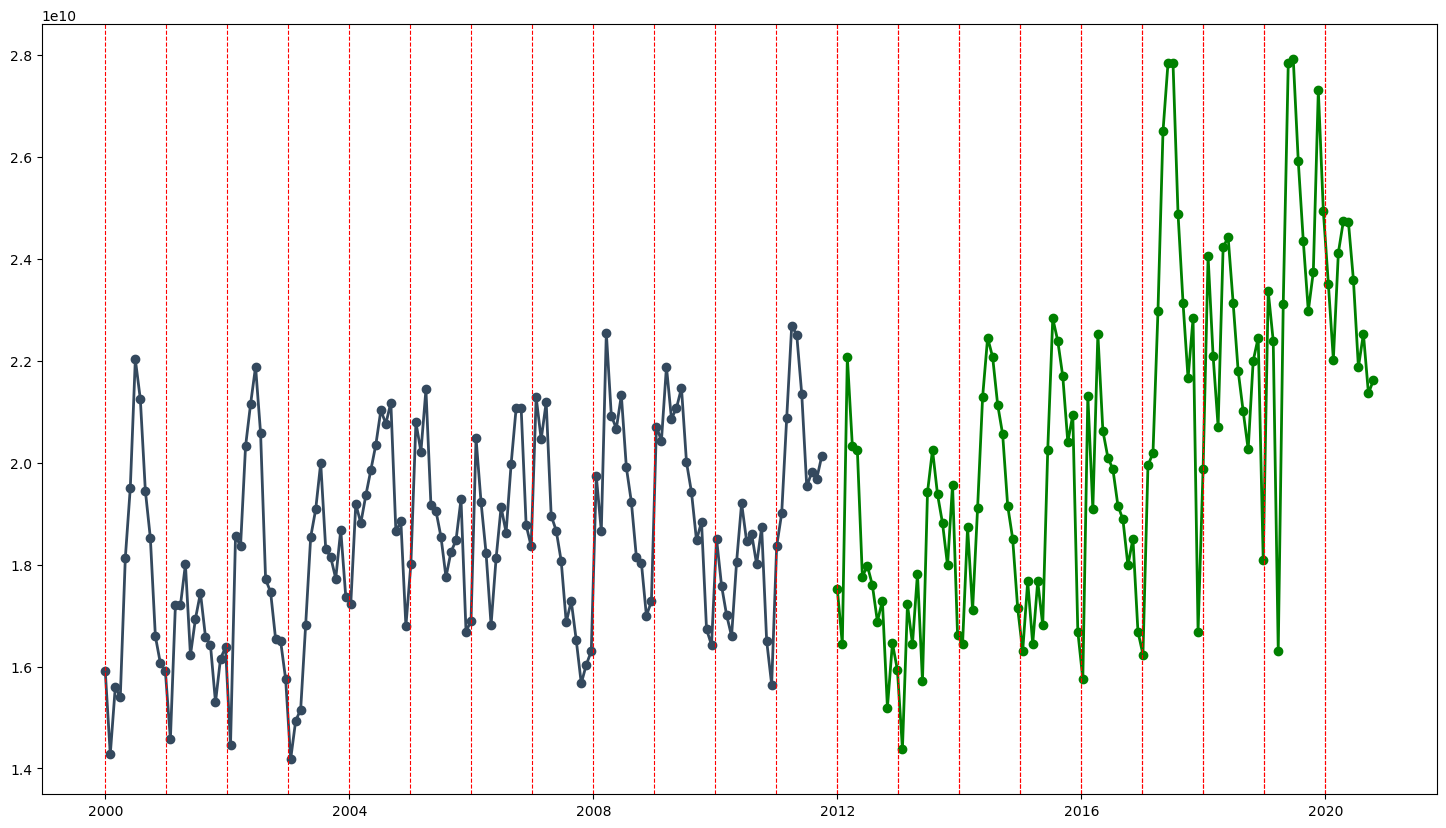

In [62]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(date_range3, lawrence_historical_df['mean_va'], linewidth=2, marker='o', linestyle='-', color='#34495E', label='Lawrence River Dataset1')
ax.plot(date_range2, all_flows[:, 4], linewidth=2, marker='o', linestyle='-', color='green', label='Lawrence River Dataset2')


for year in range(start_date3.year, end_date3.year + 1):
    ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

for year in range(start_date2.year, end_date2.year + 1):
    ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

plt.show()

In [40]:
training_niagra_data = np.array(niagra_historical_df['mean_va'])

In [42]:
len(training_niagra_data)

384

In [43]:
testing_niagra_data = all_flows[0:, 3]

In [44]:
np.save('../Data/niagra_training.npy', training_niagra_data)
np.save('../Data/niagra_testing.npy', testing_niagra_data)

In [ ]:
stc_depth_test = depth_data[144:250, 2]

stc_river_flow_test = flow_data[:-3, 1]/(1.11 * 1e9)

detroit_river_flow_test = flow_data[:-3, 2]/(1.11 * 1e9)

stc_z_calculated = [stc_depth_test[i + 1] - stc_depth_test[i] for i in range(len(stc_depth_test) - 1)] + (detroit_river_flow_test - stc_river_flow_test)

In [46]:
all_depths = np.load('../Data/depth_vectors.npy')

In [47]:
all_depths.shape

(276, 5)

In [69]:
ontario_depth = all_depths[0:144, 4]

In [66]:
len(ontario_depth)

144

In [70]:
lawrence_training_data = np.array(lawrence_historical_df['mean_va'])

In [81]:
len(lawrence_training_data[0:-1])

143

In [85]:
len(training_niagra_data[240:])

144

In [84]:
len(training_niagra_data)

384

In [87]:
(lawrence_training_data[0:] - training_niagra_data[240:])/(18.96 * 1e9)

array([0.11480563, 0.12501258, 0.1204059 , 0.10103721, 0.18480906,
       0.25898043, 0.35361733, 0.32321584, 0.28375584, 0.23121133,
       0.14400706, 0.10040492, 0.13440659, 0.11272811, 0.17200843,
       0.18504133, 0.18240894, 0.13161935, 0.17000833, 0.19880974,
       0.20284865, 0.13760674, 0.1130378 , 0.08800431, 0.10160498,
       0.03685342, 0.18640914, 0.17729901, 0.21801068, 0.30775702,
       0.35761753, 0.31841561, 0.21678482, 0.19160939, 0.15445918,
       0.1244061 , 0.12000588, 0.12428996, 0.08600422, 0.10684395,
       0.11000539, 0.22878541, 0.22561106, 0.2672131 , 0.23614061,
       0.20761018, 0.20052596, 0.21961076, 0.13760674, 0.25219301,
       0.25241237, 0.22955964, 0.19600961, 0.23885042, 0.23921172,
       0.28241384, 0.31898338, 0.32961615, 0.2260756 , 0.18280896,
       0.04560223, 0.18679625, 0.24921221, 0.22181732, 0.26241286,
       0.20517135, 0.20160988, 0.20921025, 0.20942962, 0.23081131,
       0.22065598, 0.25841266, 0.10480514, 0.15211068, 0.28281

In [88]:
len([ontario_depth[i+1] - ontario_depth[i] for i in range(len(ontario_depth) -1)])

143

In [89]:
ontario_nbs_training = [ontario_depth[i+1] - ontario_depth[i] for i in range(len(ontario_depth) -1)] + (lawrence_training_data[:-1] - training_niagra_data[240:-1])/(18.96 * 1e9)

In [90]:
ontario_nbs_training

array([0.06480563, 0.25501258, 0.3604059 , 0.38103721, 0.34480906,
       0.23898043, 0.17361733, 0.07321584, 0.08375584, 0.08121133,
       0.15400706, 0.12040492, 0.19440659, 0.21272811, 0.36200843,
       0.27504133, 0.24240894, 0.11161935, 0.02000833, 0.00880974,
       0.10284865, 0.07760674, 0.1630378 , 0.12800431, 0.22160498,
       0.14685342, 0.37640914, 0.41729901, 0.32801068, 0.16775702,
       0.07761753, 0.05841561, 0.05678482, 0.06160939, 0.11445918,
       0.1344061 , 0.08000588, 0.18428996, 0.46600422, 0.32684395,
       0.28000539, 0.15878541, 0.16561106, 0.0272131 , 0.11614061,
       0.21761018, 0.29052596, 0.31961076, 0.05760674, 0.22219301,
       0.42241237, 0.37955964, 0.29600961, 0.18885042, 0.16921172,
       0.21241384, 0.06898338, 0.12961615, 0.2760756 , 0.37280896,
       0.15560223, 0.17679625, 0.43921221, 0.30181732, 0.17241286,
       0.12517135, 0.05160988, 0.10921025, 0.11942962, 0.21081131,
       0.19065598, 0.33841266, 0.33480514, 0.11211068, 0.29281

In [91]:
ontario_nbs_testing = np.load('../Data/calculated_nbs_ontario.npy')

In [92]:
len(ontario_nbs_testing)

105

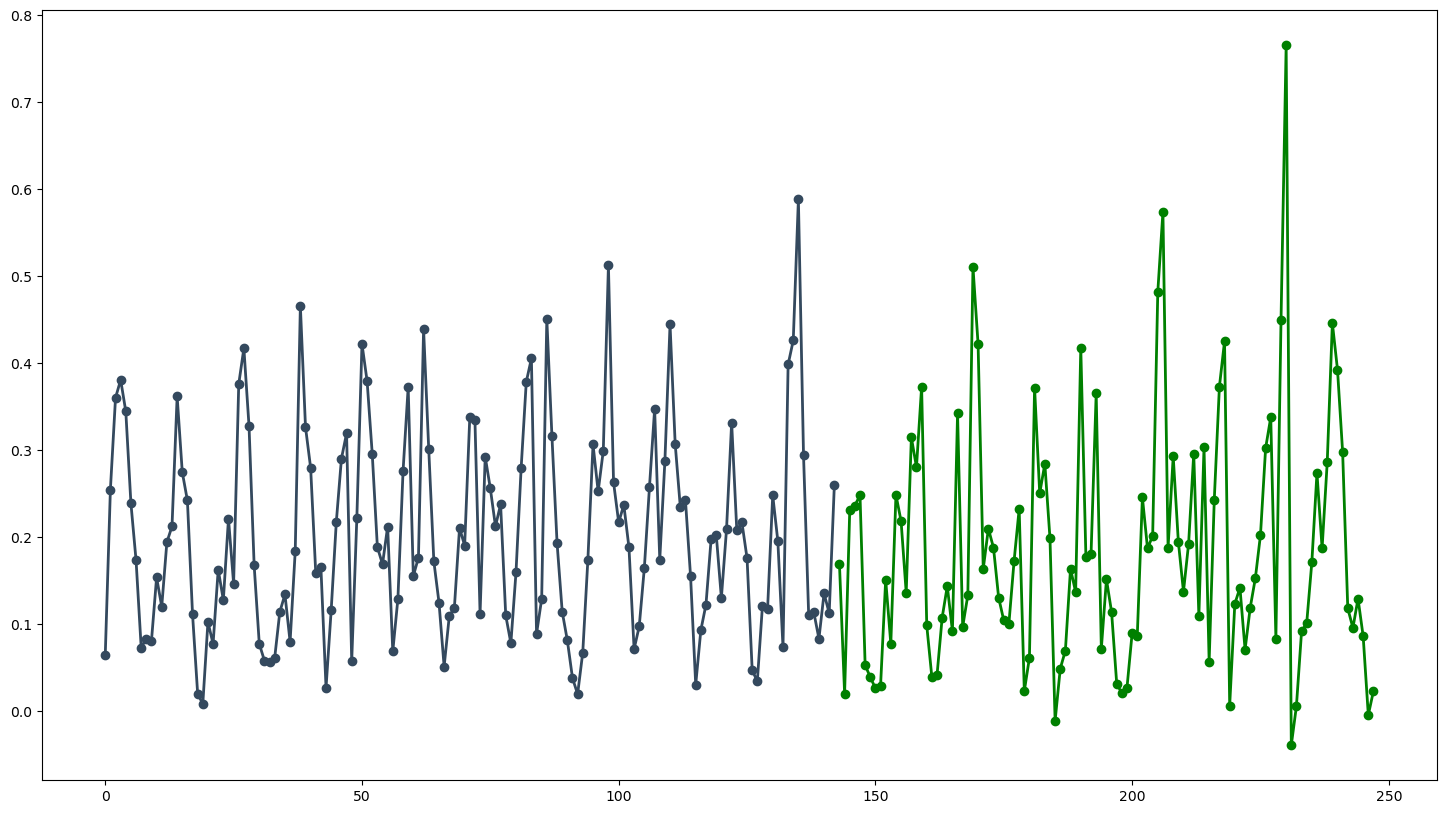

In [96]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(range(143), ontario_nbs_training, linewidth=2, marker='o', linestyle='-', color='#34495E', label='Lawrence River Dataset1')
ax.plot(range(143, 143+105), ontario_nbs_testing, linewidth=2, marker='o', linestyle='-', color='green', label='Lawrence River Dataset2')


# for year in range(start_date3.year, end_date3.year + 1):
#     ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

# for year in range(start_date2.year, end_date2.year + 1):
#     ax.axvline(datetime(year, 1, 1), color='red', linestyle='--', linewidth=0.8)

plt.show()

In [99]:
np.save('../Data/nbs_ontario_training.npy', ontario_nbs_training)